In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
confirmed=pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths=pd.read_csv('time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

#delete states
confirmed=confirmed.drop(['Province/State'],axis=1)
deaths=deaths.drop(['Province/State'],axis=1)
recovered=recovered.drop(['Province/State'],axis=1)

confirmed=confirmed.drop(['Lat'],axis=1)
deaths=deaths.drop(['Lat'],axis=1)
recovered=recovered.drop(['Lat'],axis=1)

confirmed=confirmed.drop(['Long'],axis=1)
deaths=deaths.drop(['Long'],axis=1)
recovered=recovered.drop(['Long'],axis=1)

# #group by country
confirmed=confirmed.groupby(['Country/Region']).aggregate('sum')
deaths=deaths.groupby(['Country/Region']).aggregate('sum')
recovered=recovered.groupby(['Country/Region']).aggregate('sum')

confirmed.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,34994,35070,35229,35301,35475,35526,35615,35727,35928,35981
Albania,0,0,0,0,0,0,0,0,0,0,...,3752,3851,3906,4008,4090,4171,4290,4358,4466,4570
Algeria,0,0,0,0,0,0,0,0,0,0,...,20770,21355,21948,22549,23084,23691,24278,24872,25484,26159
Andorra,0,0,0,0,0,0,0,0,0,0,...,862,877,880,880,880,884,884,889,889,897
Angola,0,0,0,0,0,0,0,0,0,0,...,576,607,638,687,705,749,779,812,851,880
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,74,74,76,76,76,76,76,76,76,82
Argentina,0,0,0,0,0,0,0,0,0,0,...,111146,114783,119301,122524,126755,130774,136118,141900,148027,153520
Armenia,0,0,0,0,0,0,0,0,0,0,...,33005,33559,34001,34462,34877,34981,35254,35693,36162,36613
Australia,0,0,0,0,4,5,5,6,9,9,...,10810,11233,11441,11802,12069,12428,12894,13302,13595,13950


In [3]:
confirmed.index
confirmed.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/15/20', '7/16/20', '7/17/20', '7/18/20', '7/19/20', '7/20/20',
       '7/21/20', '7/22/20', '7/23/20', '7/24/20'],
      dtype='object', length=185)

In [4]:
confirmed.shape
confirmed.dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
7/20/20    int64
7/21/20    int64
7/22/20    int64
7/23/20    int64
7/24/20    int64
Length: 185, dtype: object

In [5]:
# confirmed.head()
# deaths.head()

In [6]:
today=confirmed.columns[-1]
yesterday=confirmed.columns[-2]
week=confirmed.columns[-8] #is -8 because -1 is the last column (today's date)
ten_days=confirmed.columns[-11]
twenty_days=confirmed.columns[-21]

In [7]:
#Max Num Of Cases
confirmed[today].max()

4112531

In [8]:
#Min Num Of Cases
confirmed[today].min()

9

In [9]:
#Number Per Country
# confirmed_today=confirmed.groupby(['Country/Region'])[today].max()
# confirmed_today=confirmed_today.sort_values(ascending=False)
# deaths_today=deaths.groupby(['Country/Region'])[today].max()
# deaths_today=deaths_today.sort_values(ascending=False)
# recovered_today=recovered.groupby(['Country/Region'])[today].max()
# recovered_today=recovered_today.sort_values(ascending=False)
confirmed=confirmed.sort_values(by=today,ascending=False)
deaths=deaths.sort_values(by=today,ascending=False)
recovered=recovered.sort_values(by=today,ascending=False)
confirmed_max=confirmed[today]
deaths_max=deaths[today]
recovered_max=recovered[today]

4112531

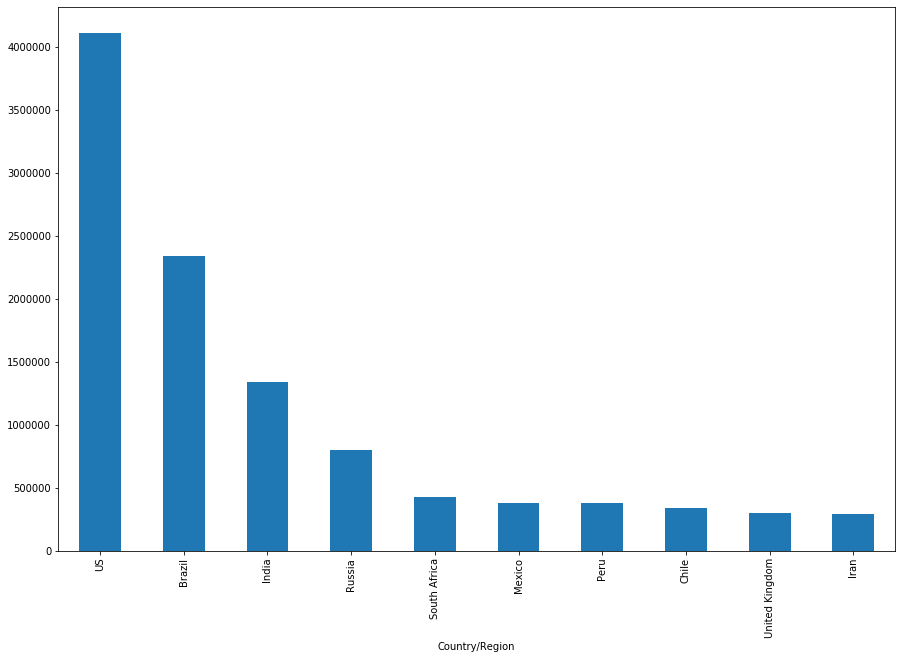

In [10]:
# confirmed_today.head()
confirmed_max.head(10).plot(kind='bar',figsize=(15,10))
confirmed[today].max()

145546

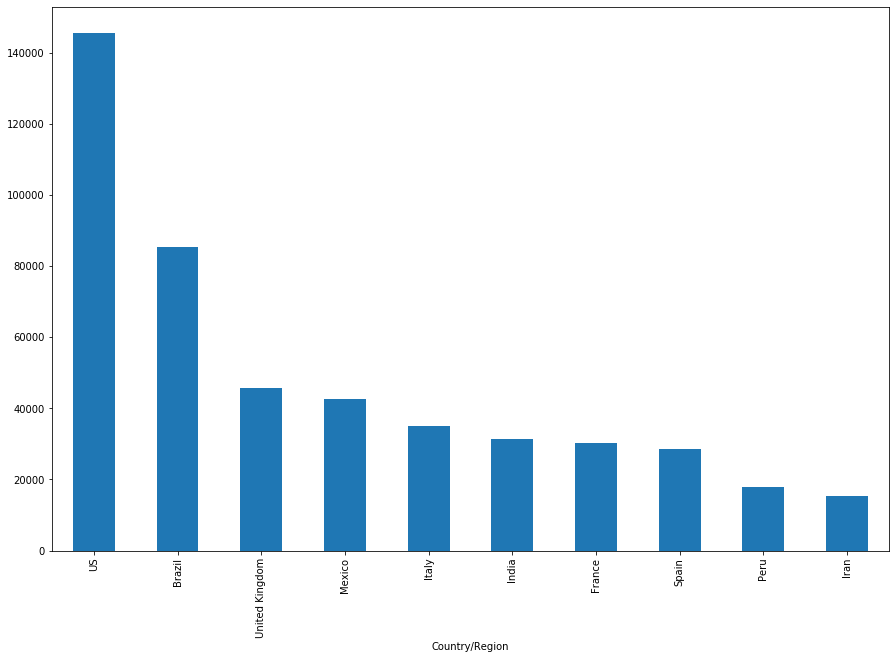

In [11]:
deaths_max.head(10).plot(kind='bar',figsize=(15,10))
deaths[today].max()

1693214

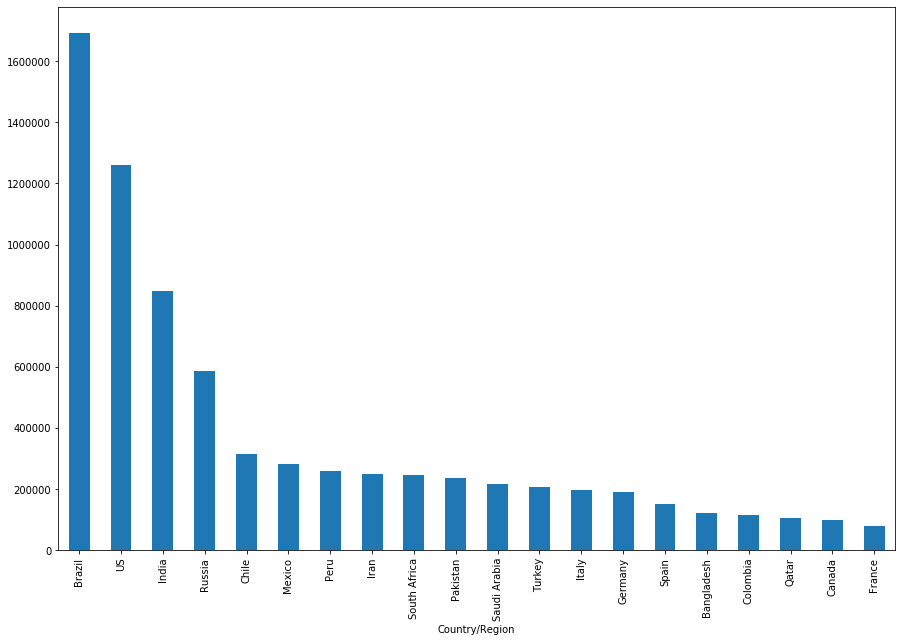

In [12]:
recovered_max.head(20).plot(kind='bar',figsize=(15,10))
recovered[today].max()

In [13]:
confirmed.T


Country/Region,US,Brazil,India,Russia,South Africa,Mexico,Peru,Chile,United Kingdom,Iran,...,Fiji,Timor-Leste,Saint Lucia,Grenada,Laos,Dominica,Saint Kitts and Nevis,Holy See,Western Sahara,MS Zaandam
1/22/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/20/20,3834677,2118646,1155338,776212,373628,349396,357681,333029,296944,276202,...,27,24,23,23,19,18,17,12,10,9
7/21/20,3899211,2159654,1193078,782040,381798,356255,362087,334683,297389,278827,...,27,24,23,23,19,18,17,12,10,9
7/22/20,3970121,2227514,1238798,787890,394948,362274,366550,336402,297952,281413,...,27,24,23,23,19,18,17,12,10,9
7/23/20,4038816,2287475,1288108,793720,408052,370712,371096,338759,298731,284034,...,27,24,24,23,19,18,17,12,10,9


4112531

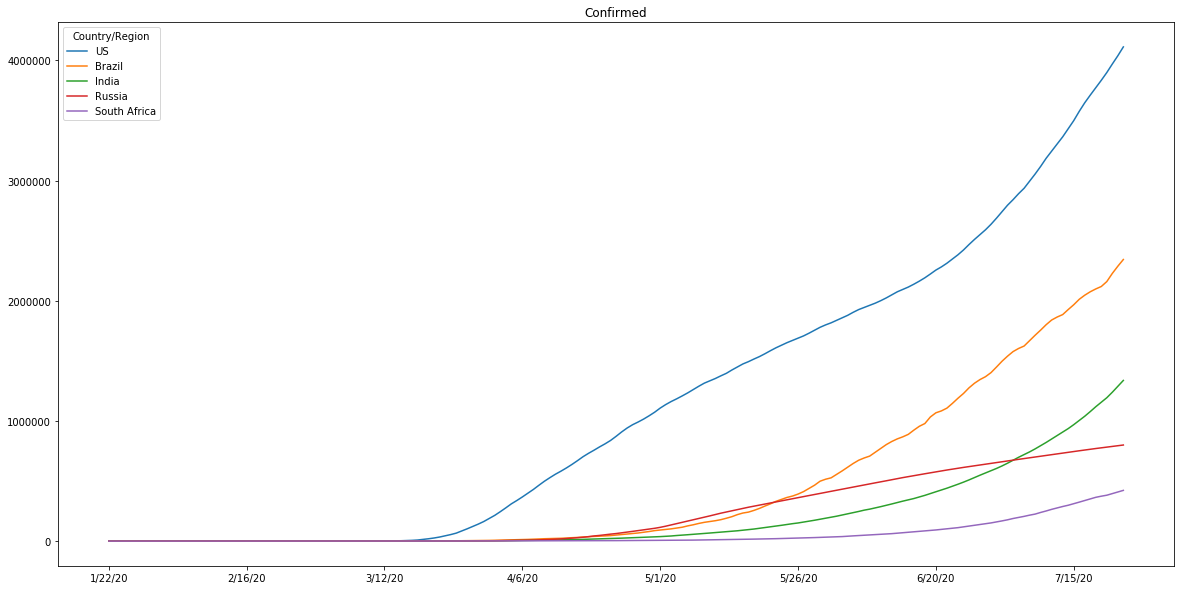

In [14]:
confirmed.head(5).T.plot(figsize=(20,10))
plt.title('Confirmed')
confirmed[today].max()


145546

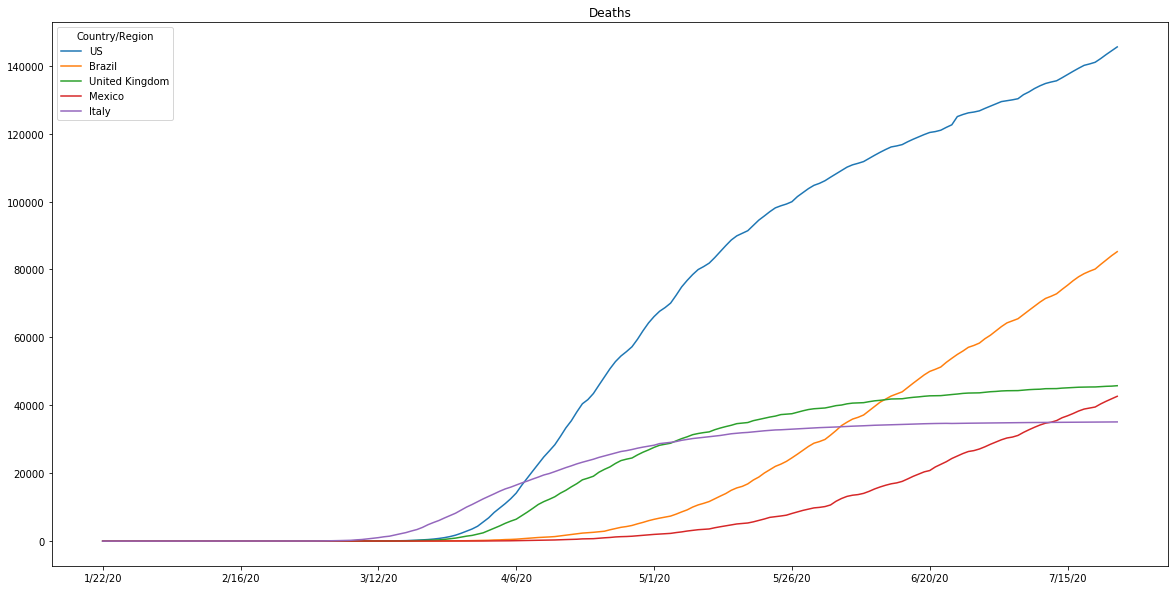

In [15]:
deaths.head(5).T.plot(figsize=(20,10))
plt.title('Deaths')
deaths[today].max()

1693214

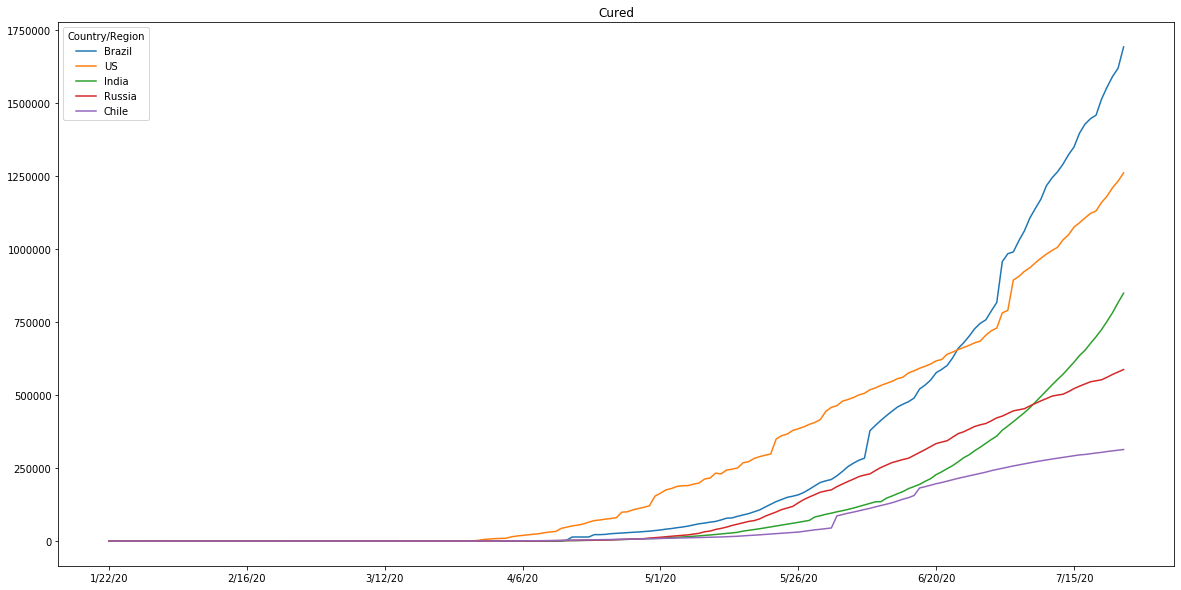

In [16]:
recovered.head(5).T.plot(figsize=(20,10))
plt.title('Cured')
recovered[today].max()

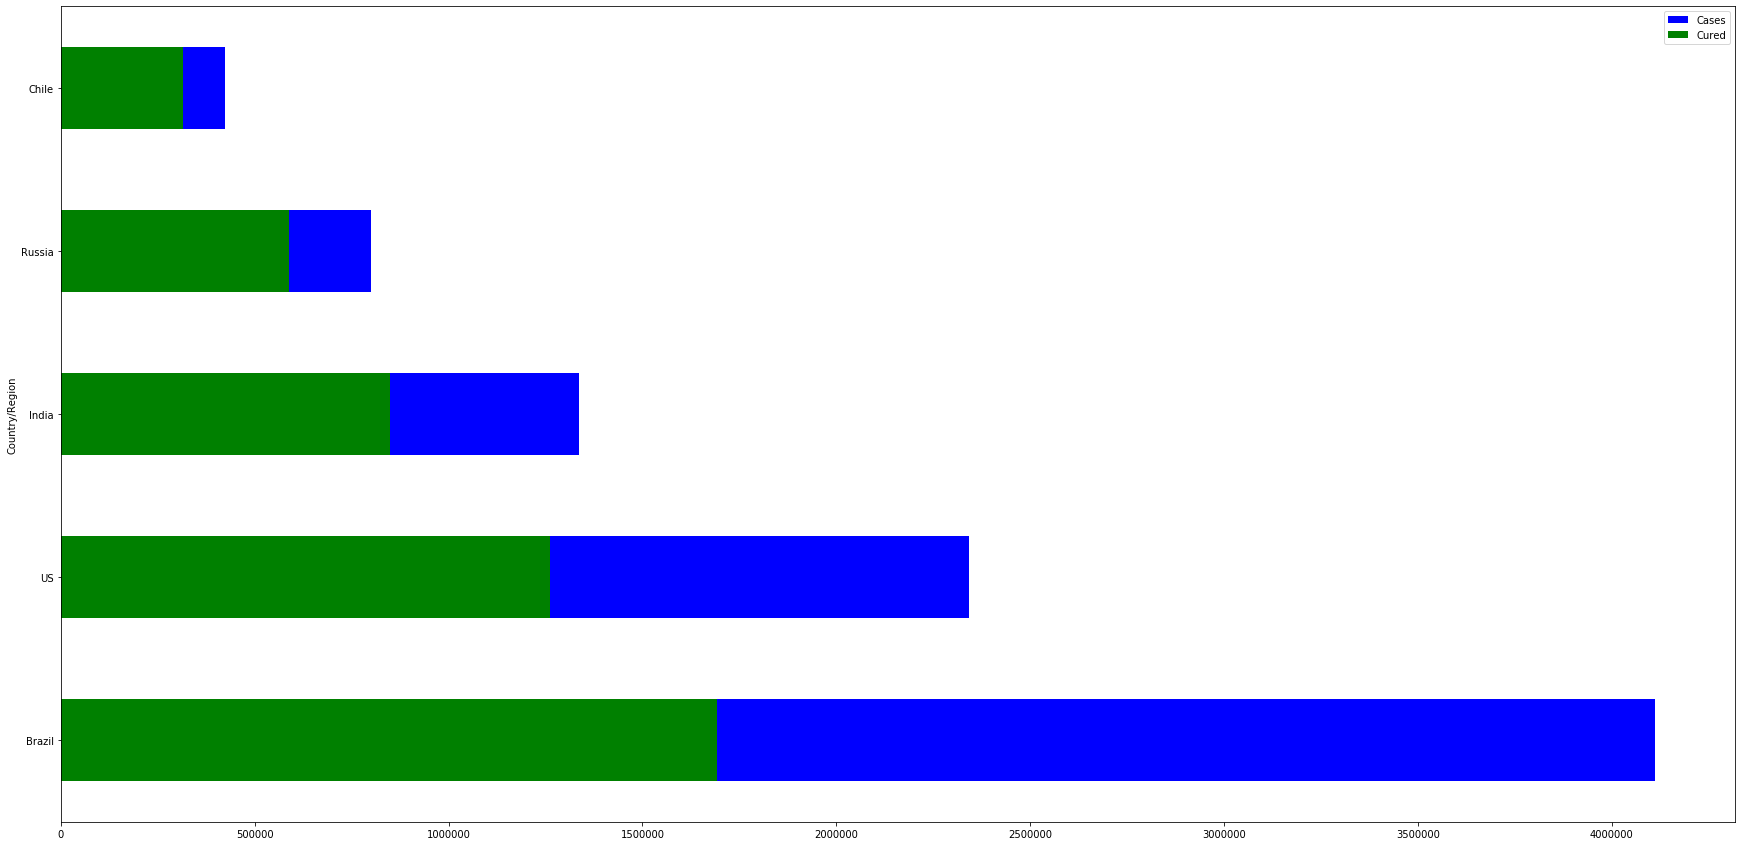

In [17]:
#Confirmed vs Cured
fig,ax=plt.subplots(figsize=(30,15))
# confirmed.head(5).max().plot(kind='barh',x=today,)
# recovered.head(5).plot(kind='barh')
confirmed[today].head(5).plot(kind='barh',color='b',label='Cases')
recovered[today].head(5).plot(kind='barh',color='g',label='Cured')
plt.legend()

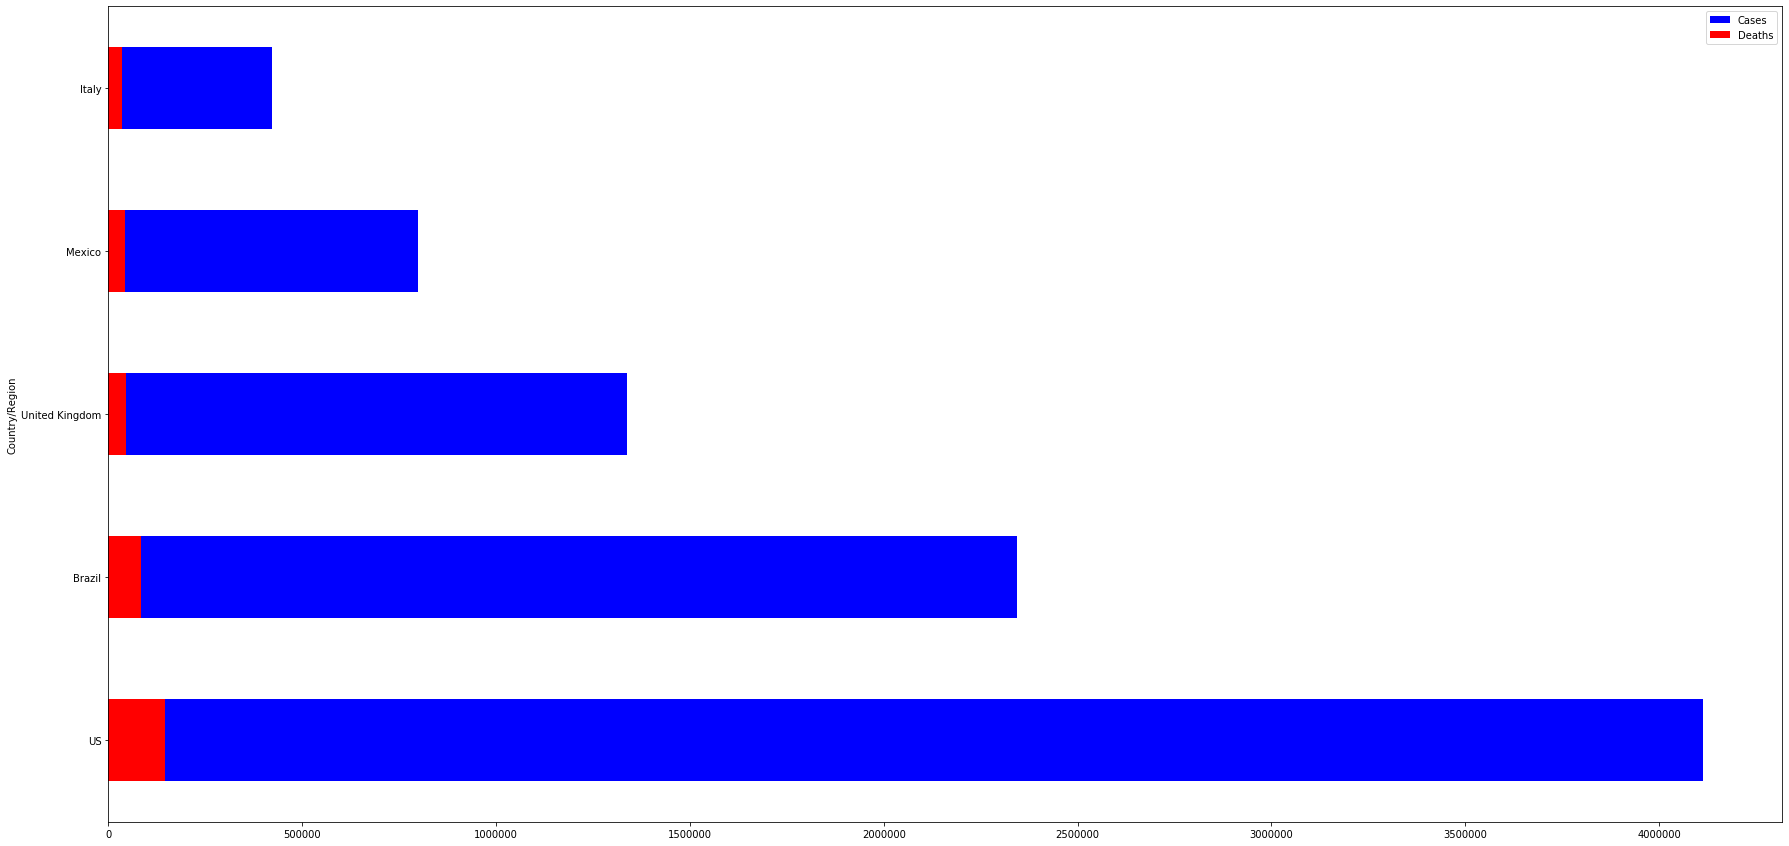

In [18]:
#Confirmed vs Deaths
fig,ax=plt.subplots(figsize=(30,15))
confirmed[today].head(5).plot(kind='barh',color='b',label='Cases')
deaths[today].head(5).plot(kind='barh',color='r',label='Deaths')
plt.legend()

In [19]:
# confirmed.head(5)

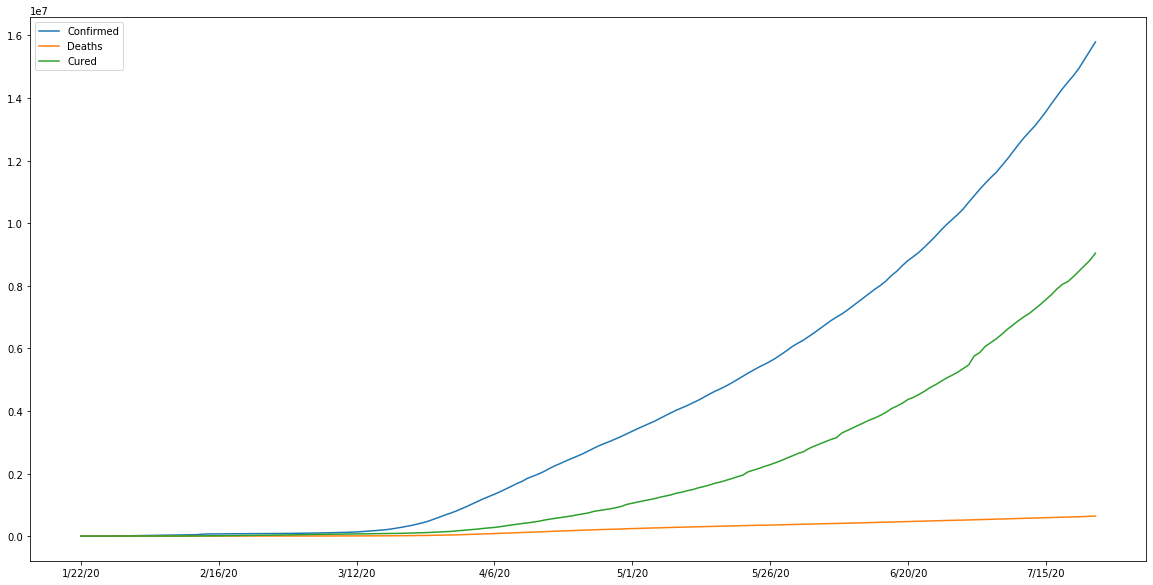

In [20]:
tot_confirmed=confirmed.sum(axis=0)
tot_deaths=deaths.sum(axis=0)
tot_recovered=recovered.sum(axis=0)
tot_confirmed.plot(figsize=(20,10))
tot_deaths.plot()
tot_recovered.plot()
plt.legend(['Confirmed','Deaths','Cured'])

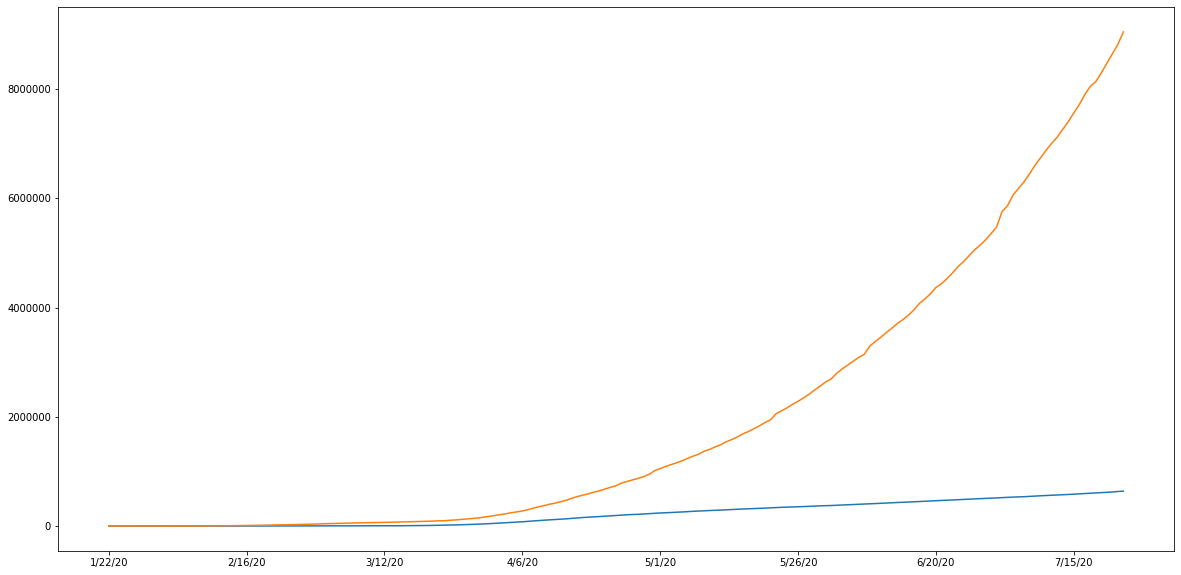

In [21]:
#RECOVERED VS DEATHS
tot_deaths.plot(figsize=(20,10))
tot_recovered.plot()

In [22]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,3498902,3576157,3647715,3711413,3773260,3834677,3899211,3970121,4038816,4112531
Brazil,0,0,0,0,0,0,0,0,0,0,...,1966748,2012151,2046328,2074860,2098389,2118646,2159654,2227514,2287475,2343366
India,0,0,0,0,0,0,0,0,1,1,...,968857,1003832,1039084,1077781,1118206,1155338,1193078,1238798,1288108,1337024
Russia,0,0,0,0,0,0,0,0,0,2,...,745197,751612,758001,764215,770311,776212,782040,787890,793720,799499
South Africa,0,0,0,0,0,0,0,0,0,0,...,311049,324221,337594,350879,364328,373628,381798,394948,408052,421996


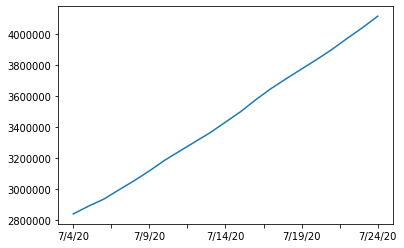

In [23]:
#USA 20 DAYS CASES
confirmed.loc['US',twenty_days:today].plot()

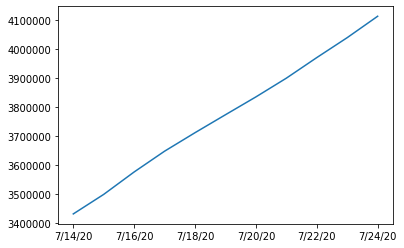

In [24]:
#USA 10 DAYS CASES
confirmed.loc['US',ten_days:today].plot()

In [25]:
#NEW CASES USA
confirmed.loc['US',today]-confirmed.loc['US',yesterday]

73715

In [26]:
#DEATHS USA
deaths.loc['US',today]-deaths.loc['US',yesterday]

1130

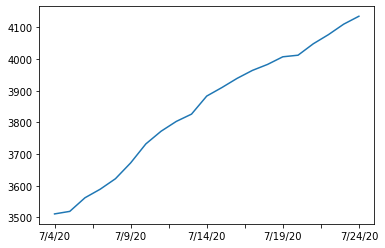

In [27]:
#NEW CASES GREECE
confirmed.loc['Greece',twenty_days:today].plot()

In [28]:
#NEW CASES
confirmed.loc['Greece',today]-confirmed.loc['Greece',yesterday]

25